# Trabajo de Mentoria - DiploDatos - Parte 3
    
Integrantes: 
    <li> Pamela Pairo
    <li> Bruno Garcia
    <li> Nicolas Chiapello
    <li> Martin Peñas
        

Este trabajo se basa en el dataset de Datos Financieros. La consigna se encuentra relacionada a la utilización del índice Piotrosky. 
<br><br>
<i> <b>Delegación de Responsabilidad / Disclaimer:</b> En el presente trabajo se abordará sobre información financiera de empresas que cotizan en el mercado de valores y sobre la selección de determinadas estrategias con un fin meramente académico. Las conclusiones a las que llegamos no son recomendación de compra ni venta de activos.

## Puntuacion Piotrosky
Piotrosky es un profesor de la Universidad de Stanford, que creo un parámtro para conocer el comportamiento de las empresas en la bolsa de valores. Le otorga una puntuación entre 0 y 9, y demostro que si se invierte de acuerdo a dicho indice en las empresas con mejor categorización se puede lograr un 13 % de rentabilidad. También es aplicable su utilización para operar a corto (esperando que la acción baje de precio) en las empresas que logren una baja puntuación. Los criterios que suman puntos, son los detallados a continuación:

Profitability Criteria

1. Net Income > 0 (+1)

2. ROA > 0 (+1)

3. CFO > 0 (+1)

4. CFO > Net Income (earnings quality) (+1)

Leverage, Liquidity, and Source of Funds Criteria

5. Long Term Debt Current Year < Long Term Debt Previous Year (decreasing leverage) (+1)

6. Current Ratio Current Year > Current Ratio Previous Year (increasing liquidity) (+1)

7. No new shares issued in the last year (shares dilution) (+1)

Operating Efficiency Criteria

8. Gross Margin CY > Gross Margin PY (+1)

9. Asset Turnover Ratio CY > Asset Turnover Ratio PY (+1)


In [299]:
#importamos librerias
import io
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns

In [441]:
#leemos el dataset
#df2 = pd.read_csv('https://raw.githubusercontent.com/Nicoch590/DatosFinancieros/main/datos_financieros_reducidos.csv',index_col=[0])
df = pd.read_csv('financial_data.csv',index_col=[0])
df = df.rename_axis('Ticker').reset_index()

## Definimos como funcion el índice Piotrosky

In [302]:
def Piotro(df, ticker):
    a = df[df.Ticker.isin([ticker])].sort_values(by="year")
    
     #Net Income > 0 (+1)
    conditionlist1 = [
        (a['Net Income'] > 0 )]
        #(a['Net Income'] < 0 )]
    choicelist1 = [1]
    a['p1'] = np.select(conditionlist1, choicelist1, default=0)

    #ROA > 0 (+1)
    conditionlist2 = [
        (a['returnOnAssets'] >= 0), (a['returnOnAssets'] < 0)]
    choicelist2 = [1, 0]
    a['p2'] = np.select(conditionlist2, choicelist2, default='Not Specified')

    #CFO > 0 (+1)
    conditionlist3 = [
        (a['Operating Cash Flow'] >= 0), (a['Operating Cash Flow'] < 0)]
    choicelist3 = [1, 0]
    a['p3'] = np.select(conditionlist2, choicelist3, default='Not Specified')

    #CFO > Net Income (earnings quality) (+1)
    conditionlist4 = [
        (a['Operating Cash Flow'] >= a['Net Income'])]
    choicelist4 = [1]
    a['p4'] = np.select(conditionlist4, choicelist4, default=0)

    #Long Term Debt Current Year < Long Term Debt Previous Year (decreasing leverage) (+1)
    a['Long-term debt_shift'] =  a['Long-term debt'].shift()

    conditionlist5 = [
        (a['Long-term debt'] >= a['Long-term debt_shift']),(a['Long-term debt'] < a['Long-term debt_shift'])]
    choicelist5 = [0, 1]
    a['p5'] = np.select(conditionlist5, choicelist5, default='Not Specified')

    #Current Ratio Current Year > Current Ratio Previous Year (increasing liquidity) (+1)
    a['currentRatio_shift'] =  a['currentRatio'].shift()

    conditionlist6 = [
        (a['currentRatio'] >= a['currentRatio_shift']),(a['currentRatio'] < a['currentRatio_shift'])]
    choicelist6 = [1, 0]
    a['p6'] = np.select(conditionlist6, choicelist6, default='Not Specified')

    #No new shares issued in the last year (shares dilution) (+1)
    conditionlist7 = [
        (a['Issuance (buybacks) of shares'] >= 0),(a['Issuance (buybacks) of shares'] < 0)]
    choicelist7 = [0, 1]
    a['p7'] = np.select(conditionlist7, choicelist7, default='Not Specified')

    #Gross Margin CY > Gross Margin PY (+1)
    a['Gross Margin_shift'] =  a['Gross Margin'].shift()

    conditionlist8 = [
        (a['Gross Margin'] >= a['Gross Margin_shift']),(a['Gross Margin'] < a['Gross Margin_shift'])]
    choicelist8 = [1, 0]
    a['p8'] = np.select(conditionlist8, choicelist8, default='Not Specified')

    #Asset Turnover Ratio CY > Asset Turnover Ratio PY (+1)
    a['assetTurnover_shift'] =  a['assetTurnover'].shift()

    conditionlist9 = [
        (a['assetTurnover'] >= a['assetTurnover_shift']),(a['assetTurnover'] < a['assetTurnover_shift'])]
    choicelist9 = [1, 0]
    a['p9'] = np.select(conditionlist9, choicelist9, default='Not Specified')

    a['p1'] = pd.to_numeric(a['p1'], downcast="integer")
    a['p2'] = pd.to_numeric(a['p2'])
    a['p3'] = pd.to_numeric(a['p3'])
    a['p4'] = pd.to_numeric(a['p4'])
    a['p5'] = pd.to_numeric(a['p5'], downcast="integer", errors="coerce")
    a['p6'] = pd.to_numeric(a['p6'], downcast="integer", errors="coerce")
    a['p7'] = pd.to_numeric(a['p7'])
    a['p8'] = pd.to_numeric(a['p8'], downcast="integer", errors="coerce")
    a['p9'] = pd.to_numeric(a['p9'], downcast="integer", errors="coerce")

    a["Piotrosky"] = a.p1 + a.p2 + a.p3 + a.p4 + a.p5 + a.p6 + a.p7 + a.p8 + a.p9
    
    a.index = a["year"]
    
    a["Rendimiento>0"] = np.where(a["AnualPriceVariation"]>= 0, "si", "no")
    
    return a

### Vemos un ejemplo de los resultados que nos arroja la función Piotrosky

In [303]:
Piotro(df, "IBM")

,Ticker,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,Income Tax Expense,Net Income - Non-Controlling int,Net Income - Discontinued ops,Net Income,Preferred Dividends,Net Income Com,EPS,EPS Diluted,Weighted Average Shs Out,Weighted Average Shs Out (Dil),Dividend per Share,Gross Margin,EBITDA Margin,EBIT Margin,Profit Margin,Free Cash Flow margin,EBITDA,EBIT,Consolidated Income,Earnings Before Tax Margin,Net Profit Margin,Cash and cash equivalents,Short-term investments,Cash and short-term investments,Receivables,Inventories,Total current assets,"Property, Plant & Equipment Net",Goodwill and Intangible Assets,Long-term investments,Tax assets,Total non-current assets,Total assets,Payables,Short-term debt,Total current liabilities,Long-term debt,Total debt,Deferred revenue,Tax Liabilities,Deposit Liabilities,Total non-current liabilities,Total liabilities,Other comprehensive income,Retained earnings (deficit),Total shareholders equity,Investments,Net Debt,Other Assets,Other Liabilities,Depreciation & Amortization,Stock-based compensation,Operating Cash Flow,Capital Expenditure,Acquisitions and disposals,Investment purchases and sales,Investing Cash flow,Issuance (repayment) of debt,Issuance (buybacks) of shares,Dividend payments,Financing Cash Flow,Effect of forex changes on cash,Net cash flow / Change in cash,Free Cash Flow,Net Cash/Marketcap,priceBookValueRatio,priceToBookRatio,priceToSalesRatio,priceEarningsRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceCashFlowRatio,priceEarningsToGrowthRatio,priceSalesRatio,dividendYield,enterpriseValueMultiple,priceFairValue,ebitperRevenue,ebtperEBIT,niperEBT,grossProfitMargin,operatingProfitMargin,pretaxProfitMargin,netProfitMargin,effectiveTaxRate,returnOnAssets,returnOnEquity,returnOnCapitalEmployed,nIperEBT,eBTperEBIT,eBITperRevenue,payablesTurnover,inventoryTurnover,fixedAssetTurnover,assetTurnover,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,daysOfInventoryOutstanding,operatingCycle,daysOfPayablesOutstanding,cashConversionCycle,debtRatio,debtEquityRatio,longtermDebtToCapitalization,totalDebtToCapitalization,interestCoverage,cashFlowToDebtRatio,companyEquityMultiplier,operatingCashFlowPerShare,freeCashFlowPerShare,cashPerShare,payoutRatio,operatingCashFlowSalesRatio,freeCashFlowOperatingCashFlowRatio,cashFlowCoverageRatios,shortTermCoverageRatios,capitalExpenditureCoverageRatios,dividendpaidAndCapexCoverageRatios,dividendPayoutRatio,Revenue per Share,Net Income per Share,Operating Cash Flow per Share,Free Cash Flow per Share,Cash per Share,Book Value per Share,Tangible Book Value per Share,Shareholders Equity per Share,Interest Debt per Share,Market Cap,Enterprise Value,PE ratio,Price to Sales Ratio,POCF ratio,PFCF ratio,PB ratio,PTB ratio,EV to Sales,Enterprise Value over EBITDA,EV to Operating cash flow,EV to Free cash flow,Earnings Yield,Free Cash Flow Yield,Debt to Equity,Debt to Assets,Net Debt to EBITDA,Current ratio,Interest Coverage,Income Quality,Dividend Yield,Payout Ratio,SG&A to Revenue,R&D to Revenue,Intangibles to Total Assets,Capex to Operating Cash Flow,Capex to Revenue,Capex to Depreciation,Stock-based compensation to Revenue,Graham Number,ROIC,Return on Tangible Assets,Graham Net-Net,Working Capital,Tangible Asset Value,Net Current Asset Value,Invested Capital,Average Receivables,Average Payables,Average Inventory,Days Sales Outstanding,Days Payables Outstanding,Days of Inventory on Hand,Receivables Turnover,Payables Turnover,Inventory Turnover,ROE,Capex per Share,Gross Profit Growth,EBIT Growth,Operating Income Growth,Net Income Growth,EPS Growth,EPS Diluted Growth,Weighted Average Shares Growth,Weighted Average Shares Diluted Growth,Dividends per Share Growth,Operating Cash Flow growth,Free Cash Flow growth,10Y Revenue Growth (per Share),5Y Revenue Growth (per Share),3Y Revenue Growth (per Share),10Y Operating CF Growth (per Share

### Observamos el comportamiento en diferentes Tickers / Activos
La función que definimos con anterioridad nos sirve para iterar sobre los tickers en los que queremos conocer el indice Piotrosky. A modo de ejemplo, vemos los resultados de las empresas Apple, IBM, Walmart.

In [334]:
tick = ["AAPL", "IBM", "WMT"]

In [335]:
b = pd.DataFrame()

for i in tick:
    b = b.append(Piotro(df, i))

### Aqui podemos ver las columnas sobre las que se basa el índice, y verlo de manera extendida

In [347]:
pd.set_option("max_columns", None)
DGnew = b[["Ticker", "Net Income", "returnOnAssets", "Operating Cash Flow", "Long-term debt", 
            "currentRatio", "Issuance (buybacks) of shares", "Gross Margin", "assetTurnover", "p1", "p2",
           "p3", "p4", "p5", "p6", "p7", "p8", "p9", "Piotrosky", "year", "AnualPriceVariation", "Rendimiento>0"]].copy()

#DGnew.to_excel("DGnew.xlsx", 'Hoja de datos')
DGnew

,Ticker,Net Income,returnOnAssets,Operating Cash Flow,Long-term debt,currentRatio,Issuance (buybacks) of shares,Gross Margin,assetTurnover,p1,p2,p3,p4,p5,p6,p7,p8,p9,Piotrosky,year,AnualPriceVariation,Rendimiento>0
year,,,,,,,,,,,,,,,,,,,,,,
2014,AAPL,3.951000e+10,1.5369,5.971300e+10,2.898700e+10,1.080,-4.427000e+10,0.3859,0.788457,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014,-2.082268,no
2015,AAPL,5.339400e+10,1.7092,8.126600e+10,5.332900e+10,1.109,-3.471000e+10,0.4006,0.804956,1,1,1,1,0.0,1.0,1,1.0,1.0,8.0,2015,12.384342,si
2016,AAPL,4.568700e+10,0.8326,6.623100e+10,7.542700e+10,1.353,-2.922700e+10,0.3908,0.670340,1,1,1,1,0.0,1.0,1,0.0,0.0,6.0,2016,48.042508,si
2017,AAPL,4.835100e+10,0.7847,6.422500e+10,9.720700e+10,1.276,-3.234500e+10,0.3847,0.610771,1,1,1,1,0.0,0.0,1,0.0,0.0,5.0,2017,-7.054338,no
2018,AAPL,5.953100e+10,1.0497,7.743400e+10,9.373500e+10,1.133,-7.206900e+10,0.3834,0.726215,1,1,1,1,1.0,0.0,1,0.0,1.0,7.0,2018,88.742465,si
2014,IBM,1.202200e+10,0.6475,1.686800e+10,3.499100e+10,1.197,-1.297000e+10,0.5001,0.791270,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,2014,-11.632237,no
2015,IBM,1.319000e+10,0.6956,1.725500e+10,3.342800e+10,1.240,-4.287000e+09,0.4977,0.739771,1,1,1,1,1.0,1.0,1,0.0,0.0,7.0,2015,27.965236,si
2016,IBM,1.187200e+10,0.6437,1.708400e+10,3.465500e+10,1.210,-3.502000e+09,0.4819,0.680335,1,1,1,1,0.0,0.0,1,0.0,0.0,5.0,2016,-4.676964,no
2017,IBM,5.753000e+09,0.2449,1.672400e+10,3.983700e+10,1.331,-4.340000e+09,0.4668,0.631314,1,1,1,1,0.0,1.0,1,0.0,0.0,6.0,2017,-22.974705,no


Vamos observando algunas ideas sobre la utilización del índice, una de las cuáles es ver sobre la evolución del precio de las acciones que mayor promedio de indice Piotrosky tuvieron en los años que vemos del dataset. 

## Comparación de Tickers con mejor puntuación Piotrosky y comparacion con indice S&P500

In [348]:
DGnew.groupby(by="Ticker").mean().Piotrosky

Ticker
AAPL    6.50
IBM     6.25
WMT     7.75
Name: Piotrosky, dtype: float64

Aplicaremos el concepto  de analisis sobre todos los tickers disponibles. Analizaremos sólo los que que tuvieron reporte de balance en el año 2014 (para tener datos de todos los años completos). Previamente quitamos las filas y tickers que no poseen datos disponibles en 2 tipos de información importantes para el cálculo del indice mencionado -Return on Assets y Issuance (buybacks) of shares-

In [349]:
df = df.dropna(axis=0, subset=["returnOnAssets"])
df = df.dropna(axis=0, subset=["Issuance (buybacks) of shares"])
h = df.year == 2014
g = df[h]

In [351]:
varTick = pd.DataFrame()
varTick = pd.DataFrame(g, columns=["Ticker"])
w = varTick.Ticker.tolist()

Iteramos la función sobre los tickers seleccionados

In [ ]:
f = pd.DataFrame()

for i in w:
    f = f.append(Piotro(df, i))
    #print(i)

A continuacion filtramos los mejores valores promedio Piotrosky

In [444]:
bestValues = f.groupby(by="Ticker").mean()
bestValues = bestValues.Piotrosky
bestValues = bestValues.to_frame()
bestValues = bestValues.sort_values(by=["Piotrosky"], ascending=False)
bestTicks = bestValues.head(20).reset_index()
bestTicks = bestTicks.Ticker.to_list()

Y a continuación mostramos gráficamente la evolución de los 20 mejores valores dentro del mercado comparado con el indice S&P 500 (SPY). Utilizaremos la API de yahoo finance para extraer dichos datos, dado que el dataset del ofrecido solo tiene valores y porcentajes anuales.

In [323]:
import yfinance as yf
bestTicks.append("SPY")
dfData = yf.download(bestTicks, start="2014-03-30", end="2019-01-01", group_by="column")['Adj Close']
yields = dfData.pct_change()
yieldscum = yields.cumsum()

[*********************100%***********************]  21 of 21 completed

2 Failed downloads:
- CBPX: No data found, symbol may be delisted
- DNKN: No data found, symbol may be delisted


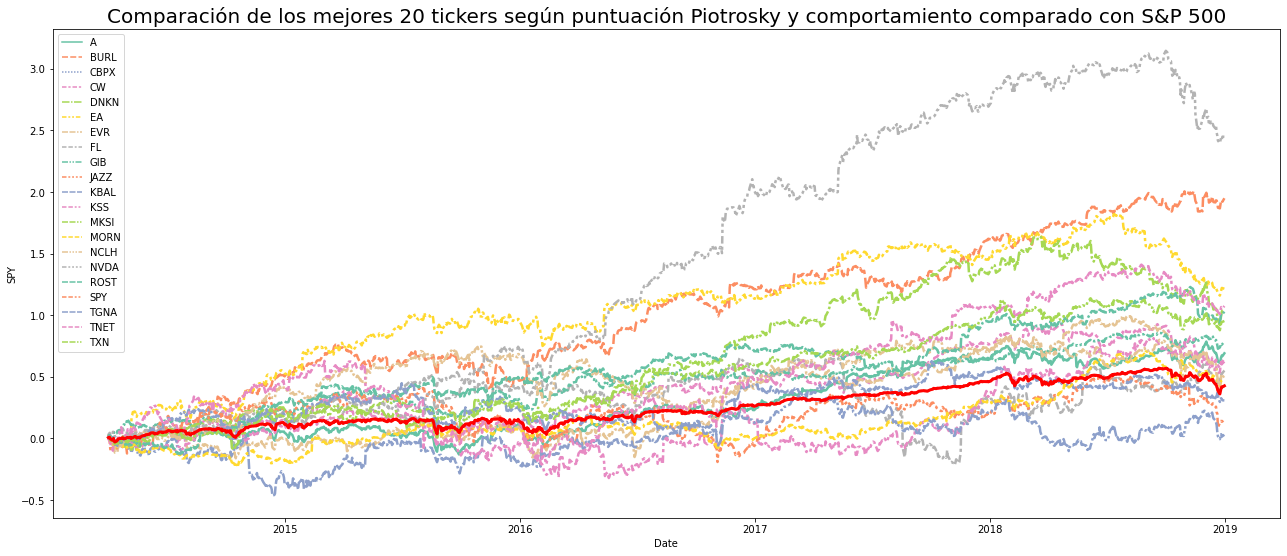

In [330]:
fig, ax = plt.subplots(figsize = (22, 9))
p = sns.lineplot(data=yieldscum, palette="Set2", linewidth=2.5)
t = sns.lineplot(data=yieldscum["SPY"], color="red", linewidth=3)
p = plt.title("Comparación de los mejores 20 tickers según puntuación Piotrosky y comportamiento comparado con S&P 500", fontsize=20)

De acuerdo al gráfico realizado, podemos ver 7que la mayoría de las acciones que tenían un indice Piotrosky alto, han tenido mejores evoluciones en su precio que el indice S&P 500. Recordamos que el indice Piotrosky aqui comparado es el promedio de los años que nos ofrece el dataset. 

## Comparación de los tickers que mejor puntuación Piotrosky tuvieron en el año 2017 y su comparación de precio en el año 2018

Podemos ver también la evolución de los índices con mayor indice Piotrosky del año 2017 (último año completo ofrecido por el dataset) con su evolución de precio en el año 2018

In [383]:
year2017 = f.year == 2017

Se eligen 34 tickers, dado que todos ellos arrojaron la puntuación máxima de 9

In [384]:
f2017 = f[year2017]
f2017 = f2017.sort_values(by= "Piotrosky", ascending=False)
e = f2017.head(34).Ticker.reset_index()
e = e["Ticker"].to_list()

In [386]:
e.append("SPY")
dfData = yf.download(e, start="2018-01-01", end="2019-01-01", group_by="column")['Adj Close']
yields = dfData.pct_change()
yieldscum = yields.cumsum()

[*********************100%***********************]  35 of 35 completed

1 Failed download:
- ZAGG: No data found, symbol may be delisted


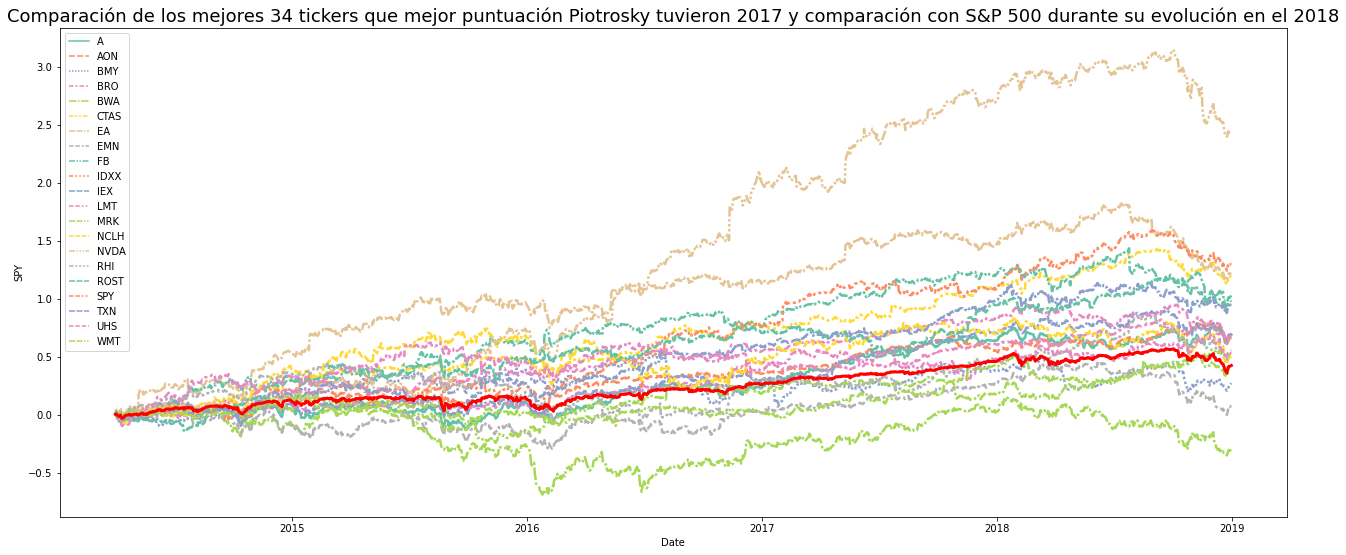

In [447]:
fig, ax = plt.subplots(figsize = (22, 9))
p = sns.lineplot(data=yieldscum, palette="Set2", linewidth=2.5)
t = sns.lineplot(data=yieldscum["SPY"], color="red", linewidth=3)
p = plt.title("Comparación de los mejores 34 tickers que mejor puntuación Piotrosky tuvieron 2017 y comparación con S&P 500 durante su evolución en el 2018", fontsize=18)

Aqui podemos ver que el indice Piotrosky no funcionó de la manera que esperábamos. Vemos muchos tickers que rindieron menos que el indice S&P 500 durante el año 2018, a pesar que todos tenían 9 de puntuación. 

# Comparación con Tickers que Integran el SP500
Aqui repetimos la primera comparación, pero esta vez sólo con los tickers que integran el SP500 (a Septiembre 2021) para conocer si el indice Piotrosky nos servirá para elegir las mejores acciones que se encuentran dentro de dicho índice de mercado. 

In [424]:
sp500 = pd.read_csv("data/sp500.csv", delimiter=";", header=1)
sp500 = sp500.Symbol.to_list()

In [427]:
f = pd.DataFrame()

for i in sp500:
    f = f.append(Piotro(df, i))
    #print(i)

In [432]:
bestValuesSP500 = f.groupby(by="Ticker").mean()

In [433]:
bestValuesSP500 = bestValuesSP500.Piotrosky
bestValuesSP500 = bestValuesSP500.to_frame()
bestValuesSP500 = bestValuesSP500.sort_values(by=["Piotrosky"], ascending=False)
bestTicksSP500 = bestValuesSP500.head(20).reset_index()
bestTicksSP500 = bestTicksSP500.Ticker.to_list()

In [437]:
import yfinance as yf
bestTicksSP500.append("SPY")

In [438]:
dfData = yf.download(bestTicksSP500, start="2014-03-30", end="2019-01-01", group_by="column")['Adj Close']
yields = dfData.pct_change()
yieldscum = yields.cumsum()

[*********************100%***********************]  21 of 21 completed


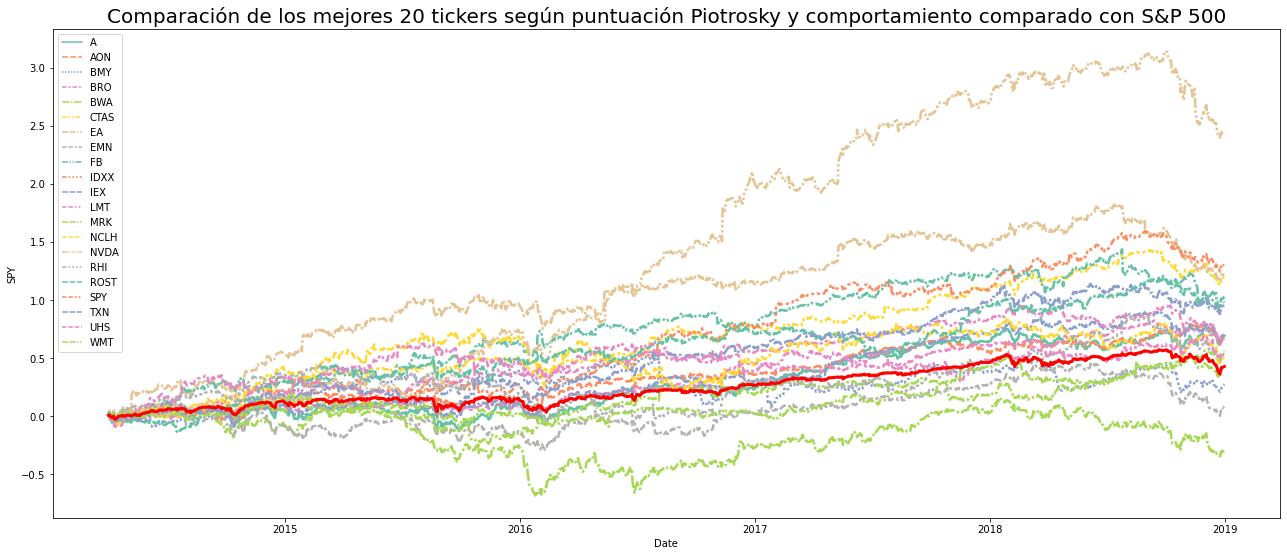

In [439]:
fig, ax = plt.subplots(figsize = (22, 9))
p = sns.lineplot(data=yieldscum, palette="Set2", linewidth=2.5)
t = sns.lineplot(data=yieldscum["SPY"], color="red", linewidth=3)
p = plt.title("Comparación de los mejores 20 tickers según puntuación Piotrosky y comportamiento comparado con S&P 500", fontsize=20)

Se puede observar que el indice ha funcionado nuevamente como estrategia previa, al poder haberlo utilizado como "filtro" de las acciones que cotizan en el S&P500. Es decir, sirve para realizar una preselección de activos para analizar por sobre la elección del indice S&P500. Es una práctica válida al preseleccionar entre diferentes activos entre los que invertir (en la jerga financiera se le conoce como screener) <br>Se recuerda el disclaimer, no es recomendación de compra, el índice debe ser utilizado para filtrar acciones y luego analizarlas de manera responsable. 